# Classifying Handwritten Digits
In this practice notebook, we will use a neural network to classify handwritten digits, 0-9.

In [227]:
import tensorflow as tf #Import tensorflow
from tensorflow.keras.datasets import mnist #Import data set
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Loading the Data
The data consists of 60,000 training examples of hand-written digits on a 28x28 pixel grid

In [228]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [229]:
print(f"x_train shape = {x_train.shape}")
print(f"y_train shape = {y_train.shape}")

x_train shape = (60000, 28, 28)
y_train shape = (60000,)


For our purposes, we will introduce a variable, set_size, which will define the amount of examples used during training. We will also create a new 2D matrix, X, which flattens the 28x28 pixel data into each row of the training set.

In [230]:
set_size = 8000 #Specifies an index at which to truncate the original data set

In [231]:
X = np.zeros([set_size,28*28])
for i in range(set_size):
    example2d = x_train[i]
    example1d = example2d.flatten()
    X[i] = example1d
print(f"X shape = {X.shape}")
Y = y_train[0:set_size]
print(f"Y shape = {Y.shape}")

X shape = (8000, 784)
Y shape = (8000,)


# Visualizing the Data

Text(0.5, 1.0, 'Target: 3')

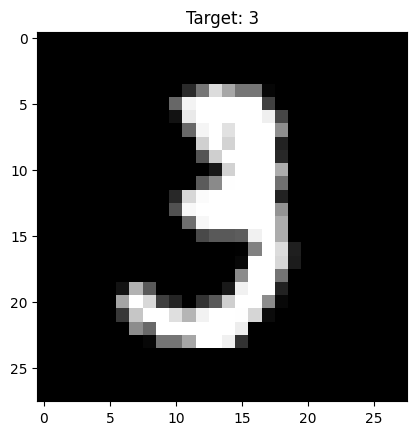

In [232]:
plt.imshow(X[10].reshape(28,28), cmap = 'grey')
plt.title(f"Target: {Y[10]}")

Below, 64 random examples are shown with their associated target values

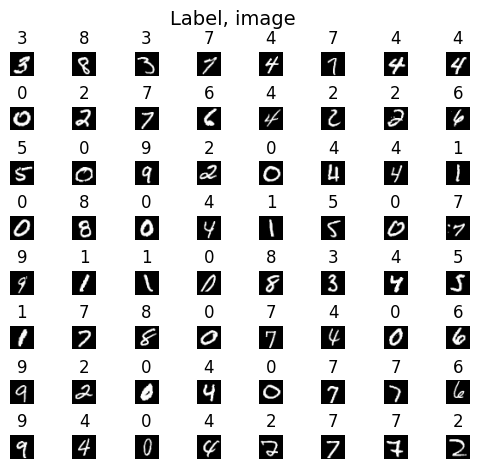

In [233]:
m,n = X.shape

fig, axes = plt.subplots(8,8,figsize = (5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    random_example_reshaped = X[random_index].reshape((28,28))
    ax.imshow(random_example_reshaped, cmap = 'grey')
    
    ax.set_title(Y[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# Constructing the Model
We will create a 3-layer neural network to train the data on. The first two layers will have ReLU activation functions, while the final layer will use a linear activation function. The final (output) layer has 10 units because we wish to classify a given input among 10 possible outputs.

In [234]:
model = Sequential([tf.keras.Input(shape = (784,)),
                    Dense(units = 25, activation = 'relu', name = "L1"),
                   Dense(units = 15, activation = 'relu', name = "L2"),
                   Dense(units = 10, activation = 'linear', name = "L3")])

# Compile and Fit the Model
Compiling the model will define the loss function used to quantify the error in predicting the target, as well as the optimizer used for minimizing the loss. 
- The loss function which will be used is the SparseCategoricalCrossentropy loss function, a generalization of the logistic loss function. Since the model's output is still linear, we must include 'from_logits = True' to specify that the output should be converted to a softmax function.
- For the optimizer, we will use Adam, or adaptive moment. This optimizer is similar to gradient descent, only it adapts the learning rate of each parameter according to its behavior when optimizing. If the parameter steadily increases/decreases in value during optimization, the associated learning rate will increase to speed up its path to minimizing the cost. If the parameter oscillates back and forth, Adam will decrease the associated learning rate, so smaller steps will be taken.

In [235]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

In [236]:
model.fit(X,Y,epochs = 40)

Epoch 1/40
250/250 [==============================] - 1s 3ms/step - loss: 5.0343
Epoch 2/40
250/250 [==============================] - 1s 2ms/step - loss: 2.2330
Epoch 3/40
250/250 [==============================] - 1s 2ms/step - loss: 2.1180
Epoch 4/40
250/250 [==============================] - 1s 3ms/step - loss: 2.0562
Epoch 5/40
250/250 [==============================] - 1s 3ms/step - loss: 2.0089
Epoch 6/40
250/250 [==============================] - 1s 3ms/step - loss: 1.9677
Epoch 7/40
250/250 [==============================] - 1s 3ms/step - loss: 1.9384
Epoch 8/40
250/250 [==============================] - 1s 3ms/step - loss: 1.9062
Epoch 9/40
250/250 [==============================] - 1s 2ms/step - loss: 1.8192
Epoch 10/40
250/250 [==============================] - 1s 3ms/step - loss: 1.5994
Epoch 11/40
250/250 [==============================] - 1s 3ms/step - loss: 1.3797
Epoch 12/40
250/250 [==============================] - 1s 3ms/step - loss: 1.2564
Epoch 13/40
250/250 [====

# Predicting with the Model
Let us select a random index from X, view its target value, and compare to what the model predicts its target value to be.

Text(0.5, 0.98, 'Target: 2')

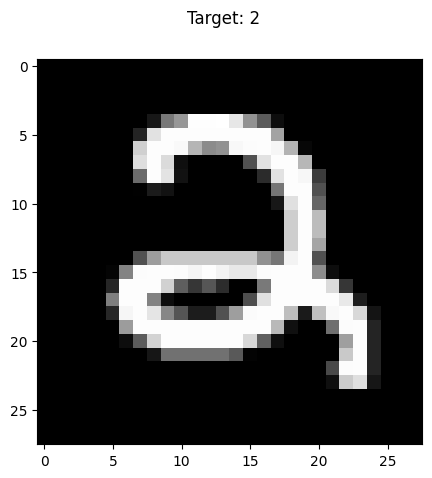

In [238]:
#Choose random training example to display
random_index = np.random.randint(m)
random_example2d = X[random_index].reshape(28,28)

fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.imshow(random_example2d, cmap = "grey")
fig.suptitle(f"Target: {Y[random_index]}")

In [242]:
yhat = model.predict(X[random_index].reshape(1,784), verbose = 0) #Model prediction
print(f"Model prediction: {yhat.argmax()}")

Model prediction: 2


# Looking at the Errors
Let's look at some of the examples where the model incorrectly predicted a training example's target value

In [244]:
yhats_raw = model.predict(X, verbose = 0)
yhats = np.zeros(set_size)
for i in range(set_size):
    yhats[i] = yhats_raw[i].argmax()

In [245]:
error_indices = []
for i in range(set_size):
    if yhats[i]!=Y[i]:
        error_indices.append(i)

In [246]:
print(f"Number of errors = {len(error_indices)}")

Number of errors = 274


Text(0.5, 0.98, 'Target: 2, Prediction: 6.0')

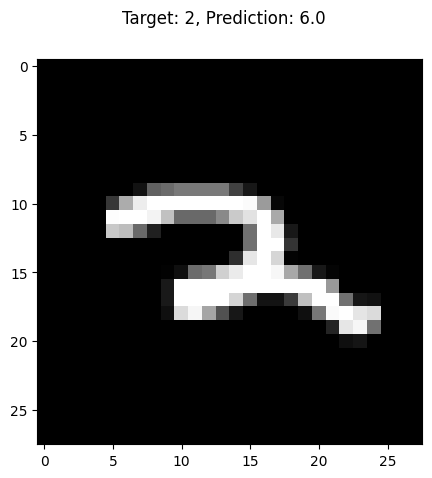

In [247]:
import random
error_index = random.choice(error_indices)
error_example2d = X[error_index].reshape(28,28)

fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.imshow(error_example2d, cmap = "grey")
fig.suptitle(f"Target: {Y[error_index]}, Prediction: {yhats[error_index]}")